<a href="https://colab.research.google.com/github/Markohf/sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/Markohf/sales_predictions/main/sales_predictions.csv'
df_original = pd.read_csv(url)

###Limpieza de Datos

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_original.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df_original['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [20]:
#Veo que tiendas no cuentan con el dato size
df_original.groupby(['Outlet_Identifier','Outlet_Size'],dropna=False)[['Outlet_Size']].count()

,,Outlet_Size
Outlet_Identifier,Outlet_Size,
OUT010,NaN,0
OUT013,High,932
OUT017,NaN,0
OUT018,Medium,928
OUT019,Small,528
OUT027,Medium,935
OUT035,Small,930
OUT045,NaN,0
OUT046,Small,930


In [24]:
#Veo si puedo inferir el size por el numero de items
df_original.groupby(['Outlet_Size','Outlet_Identifier'],dropna=False)[['Item_Identifier']].count()

Item_Identifier
Outlet_Size Outlet_Identifier                 
High        OUT013                         932
Medium      OUT018                         928
            OUT027                         935
            OUT049                         930
Small       OUT019                         528
            OUT035                         930
            OUT046                         930
NaN         OUT010                         555
            OUT017                         926
            OUT045                         929

In [27]:
#Veo si puedo inferir el size por el monto de venta
#PREGUNTA: como quitar la notacion cientifica
df_original.groupby(['Outlet_Size','Outlet_Identifier'],dropna=False)[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Size Outlet_Identifier                   
High        OUT013                  2.142664e+06
Medium      OUT018                  1.851823e+06
            OUT027                  3.453926e+06
            OUT049                  2.183970e+06
Small       OUT019                  1.796941e+05
            OUT035                  2.268123e+06
            OUT046                  2.118395e+06
NaN         OUT010                  1.883402e+05
            OUT017                  2.167465e+06
            OUT045                  2.036725e+06

In [28]:
#Veo si puedo inferir el size por el tipo de location
df_original.groupby(['Outlet_Location_Type','Outlet_Size','Outlet_Identifier'],dropna=False)[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Location_Type Outlet_Size Outlet_Identifier                   
Tier 1               Medium      OUT049                  2.183970e+06
                     Small       OUT019                  1.796941e+05
                                 OUT046                  2.118395e+06
Tier 2               Small       OUT035                  2.268123e+06
                     NaN         OUT017                  2.167465e+06
                                 OUT045                  2.036725e+06
Tier 3               High        OUT013                  2.142664e+06
                     Medium      OUT018                  1.851823e+06
                                 OUT027                  3.453926e+06
                     NaN         OUT010                  1.883402e+05

Busco formas de poder inferir el tamano de las tiendas que no tienen dicho dato, pero no encuentro relacino ni por el numero de items, monto de venta o localizaicon asi que simplemente cuando analice dicha variable tendre en cuenta que esas tiendas no cuentan con ese dato.

In [30]:
#Veo que items no cuentan con el dato weight
df_original.groupby(['Item_Identifier','Item_Weight'],dropna=False)[['Item_Weight']].sum()

Item_Weight
Item_Identifier Item_Weight             
DRA12           11.60              69.60
DRA24           19.35              96.75
                NaN                 0.00
DRA59           8.27               49.62
                NaN                 0.00
...                                  ...
NCZ42           10.50              52.50
NCZ53           9.60               38.40
                NaN                 0.00
NCZ54           14.65              73.25
                NaN                 0.00

[2697 rows x 1 columns]

Encuentro de puedo obtener los valores faltantes ya que a veces aparecen y aveces no
PENDIENTE

In [31]:
df_original.groupby(['Item_Identifier','Item_Weight'])[['Item_Weight']].sum()

,,Item_Weight
Item_Identifier,Item_Weight,
DRA12,11.600,69.600
DRA24,19.350,96.750
DRA59,8.270,49.620
DRB01,7.390,14.780
DRB13,6.115,30.575
...,...,...
NCZ30,6.590,39.540
NCZ41,19.850,99.250
NCZ42,10.500,52.500


#Graficos

In [44]:
gb = df_original.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
gb

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


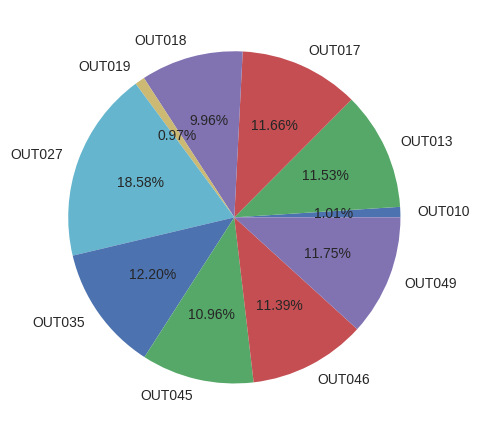

In [47]:
#Ver que tienda vende mas
label = gb.index
values = gb.values
plt.figure(dpi=100)
plt.style.use('seaborn')
plt.pie(values, labels=label, autopct="%.2f%%")
plt.show()

In [48]:
gb = df_original.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()
gb

,Item_Outlet_Sales
Item_Type,
Baking Goods,1.265525e+06
Breads,5.532372e+05
Breakfast,2.322990e+05
Canned,1.444151e+06
Dairy,1.522594e+06
Frozen Foods,1.825735e+06
Fruits and Vegetables,2.820060e+06
Hard Drinks,4.577934e+05
Health and Hygiene,1.045200e+06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


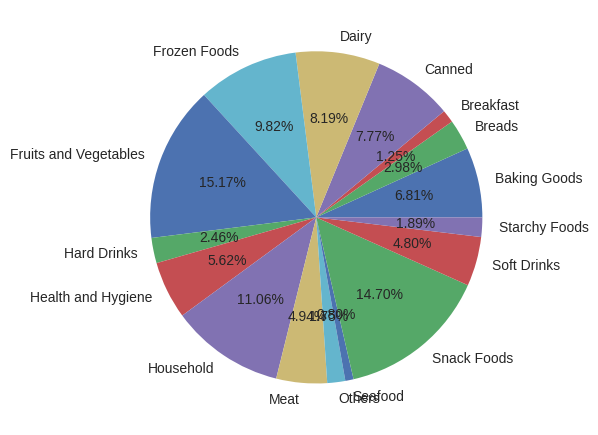

In [50]:
#Ver que tipo de item se vende mas
label = gb.index
values = gb.values
plt.figure(dpi=100)
plt.style.use('seaborn')
plt.pie(values, labels=label, autopct="%.2f%%")
plt.show()